<a href="https://colab.research.google.com/github/binuprasad619/binuprasad619/blob/main/project_sentiment_analysis_steam_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Import the Necessary Dependencies**

In [26]:
# utilities
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

**Read and Load the Dataset**

In [27]:
# Importing the dataset
data_review = pd.read_csv('steam_reviews.csv')
data_review

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight
...,...,...,...,...,...,...,...,...
434886,2018-11-17,1,37,10,False,Recommended,YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...,"Warhammer 40,000: Mechanicus"
434887,2018-11-17,3,41,38,False,Recommended,Domini and Dominae I believe what we are deali...,"Warhammer 40,000: Mechanicus"
434888,2018-11-20,0,0,36,False,Recommended,First off if you like X Com style of games you...,"Warhammer 40,000: Mechanicus"
434889,2018-11-18,1,44,12,False,Recommended,As a disclaimer I'm an AdMech player on the ta...,"Warhammer 40,000: Mechanicus"


# **Exploratory Data Analysis**

**Five top records of data**

In [28]:
data_review.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


**Number of Rows and Columns**

In [29]:
print("Number of Rows and Columns :{}".format(data_review.shape))

print('No of columns in the data is:  ', len(data_review.columns))
print('No of rows in the data is:  ', len(data_review))

Number of Rows and Columns :(434891, 8)
No of columns in the data is:   8
No of rows in the data is:   434891


**Columns/features in data**

In [30]:
data_review.columns

Index(['date_posted', 'funny', 'helpful', 'hour_played',
       'is_early_access_review', 'recommendation', 'review', 'title'],
      dtype='object')

In [31]:
data_review.describe(include="all")

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
count,434891,4.348910e+05,434891.000000,434891.000000,434891,434891,433375,434891
unique,1953,NaN,NaN,NaN,2,2,379911,48
top,2017-06-15,NaN,NaN,NaN,False,Recommended,good game,PLAYERUNKNOWN'S BATTLEGROUNDS
freq,7359,NaN,NaN,NaN,307900,303593,1443,145685
mean,NaN,5.333024e+05,1.004114,364.130773,NaN,NaN,NaN,NaN
std,NaN,4.785640e+07,59.462935,545.961198,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,0.000000e+00,0.000000,62.000000,NaN,NaN,NaN,NaN
50%,NaN,0.000000e+00,0.000000,190.000000,NaN,NaN,NaN,NaN
75%,NaN,0.000000e+00,0.000000,450.000000,NaN,NaN,NaN,NaN


**Data Information**

In [32]:
data_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


**Datatype of each column**

In [33]:
data_review.dtypes

date_posted               object
funny                      int64
helpful                    int64
hour_played                int64
is_early_access_review      bool
recommendation            object
review                    object
title                     object
dtype: object

**Identifying Number of null values in each column**

In [34]:
print(data_review.isnull().sum())

date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
dtype: int64


In [35]:
data_review.dropna(subset=['review'], inplace=True)

In [36]:
print(data_review.isnull().sum())

date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
dtype: int64


In [37]:
print("Number of Rows and Columns :{}".format(data_review.shape))

print('No of columns in the data is:  ', len(data_review.columns))
print('No of rows in the data is:  ', len(data_review))

Number of Rows and Columns :(433375, 8)
No of columns in the data is:   8
No of rows in the data is:   433375


In [38]:
len(data_review['title'].unique()), data_review['title'].unique()

(48,
 array(['Expansion - Hearts of Iron IV: Man the Guns', 'Dead by Daylight',
        'Wargroove', 'Wallpaper Engine', 'Factorio',
        'Insurgency: Sandstorm', 'Cold Waters', 'Tannenberg',
        'Pathfinder: Kingmaker', 'MONSTER HUNTER: WORLD',
        'Divinity: Original Sin 2 - Definitive Edition',
        'Football Manager 2019', "Garry's Mod", 'Survivor Pass: Vikendi',
        'Moonlighter', 'Terraria', 'GOD EATER 3',
        'Sid Meier’s Civilization® VI', 'Rocket League®',
        'Subnautica: Below Zero', "Tom Clancy's Rainbow Six® Siege",
        'ASTRONEER', 'Sid Meier’s Civilization® VI: Rise and Fall',
        'Kenshi', 'Euro Truck Simulator 2', 'Grand Theft Auto V',
        'RimWorld', 'NBA 2K19', 'RESIDENT EVIL 2 / BIOHAZARD RE:2',
        'Slay the Spire', 'My Time At Portia', 'Foundation', 'Beat Saber',
        "Sid Meier's Civilization® VI: Gathering Storm", 'Stardew Valley',
        'Farming Simulator 19', "PLAYERUNKNOWN'S BATTLEGROUNDS",
        'Overcooked! 2

In [39]:
data_review['review_length'] = data_review.apply(lambda row: len(str(row['review'])), axis=1)

data_review['recommendation_int'] = data_review['recommendation'] == 'Recommended'
data_review['recommendation_int'] = data_review['recommendation_int'].astype(int)

In [40]:
data_review

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review_length,recommendation_int
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns,195,1
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns,4,1
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,171,1
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,2094,1
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight,1397,1
...,...,...,...,...,...,...,...,...,...,...
434886,2018-11-17,1,37,10,False,Recommended,YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...,"Warhammer 40,000: Mechanicus",1977,1
434887,2018-11-17,3,41,38,False,Recommended,Domini and Dominae I believe what we are deali...,"Warhammer 40,000: Mechanicus",2535,1
434888,2018-11-20,0,0,36,False,Recommended,First off if you like X Com style of games you...,"Warhammer 40,000: Mechanicus",730,1
434889,2018-11-18,1,44,12,False,Recommended,As a disclaimer I'm an AdMech player on the ta...,"Warhammer 40,000: Mechanicus",1789,1


<Axes: xlabel='review', ylabel='title'>

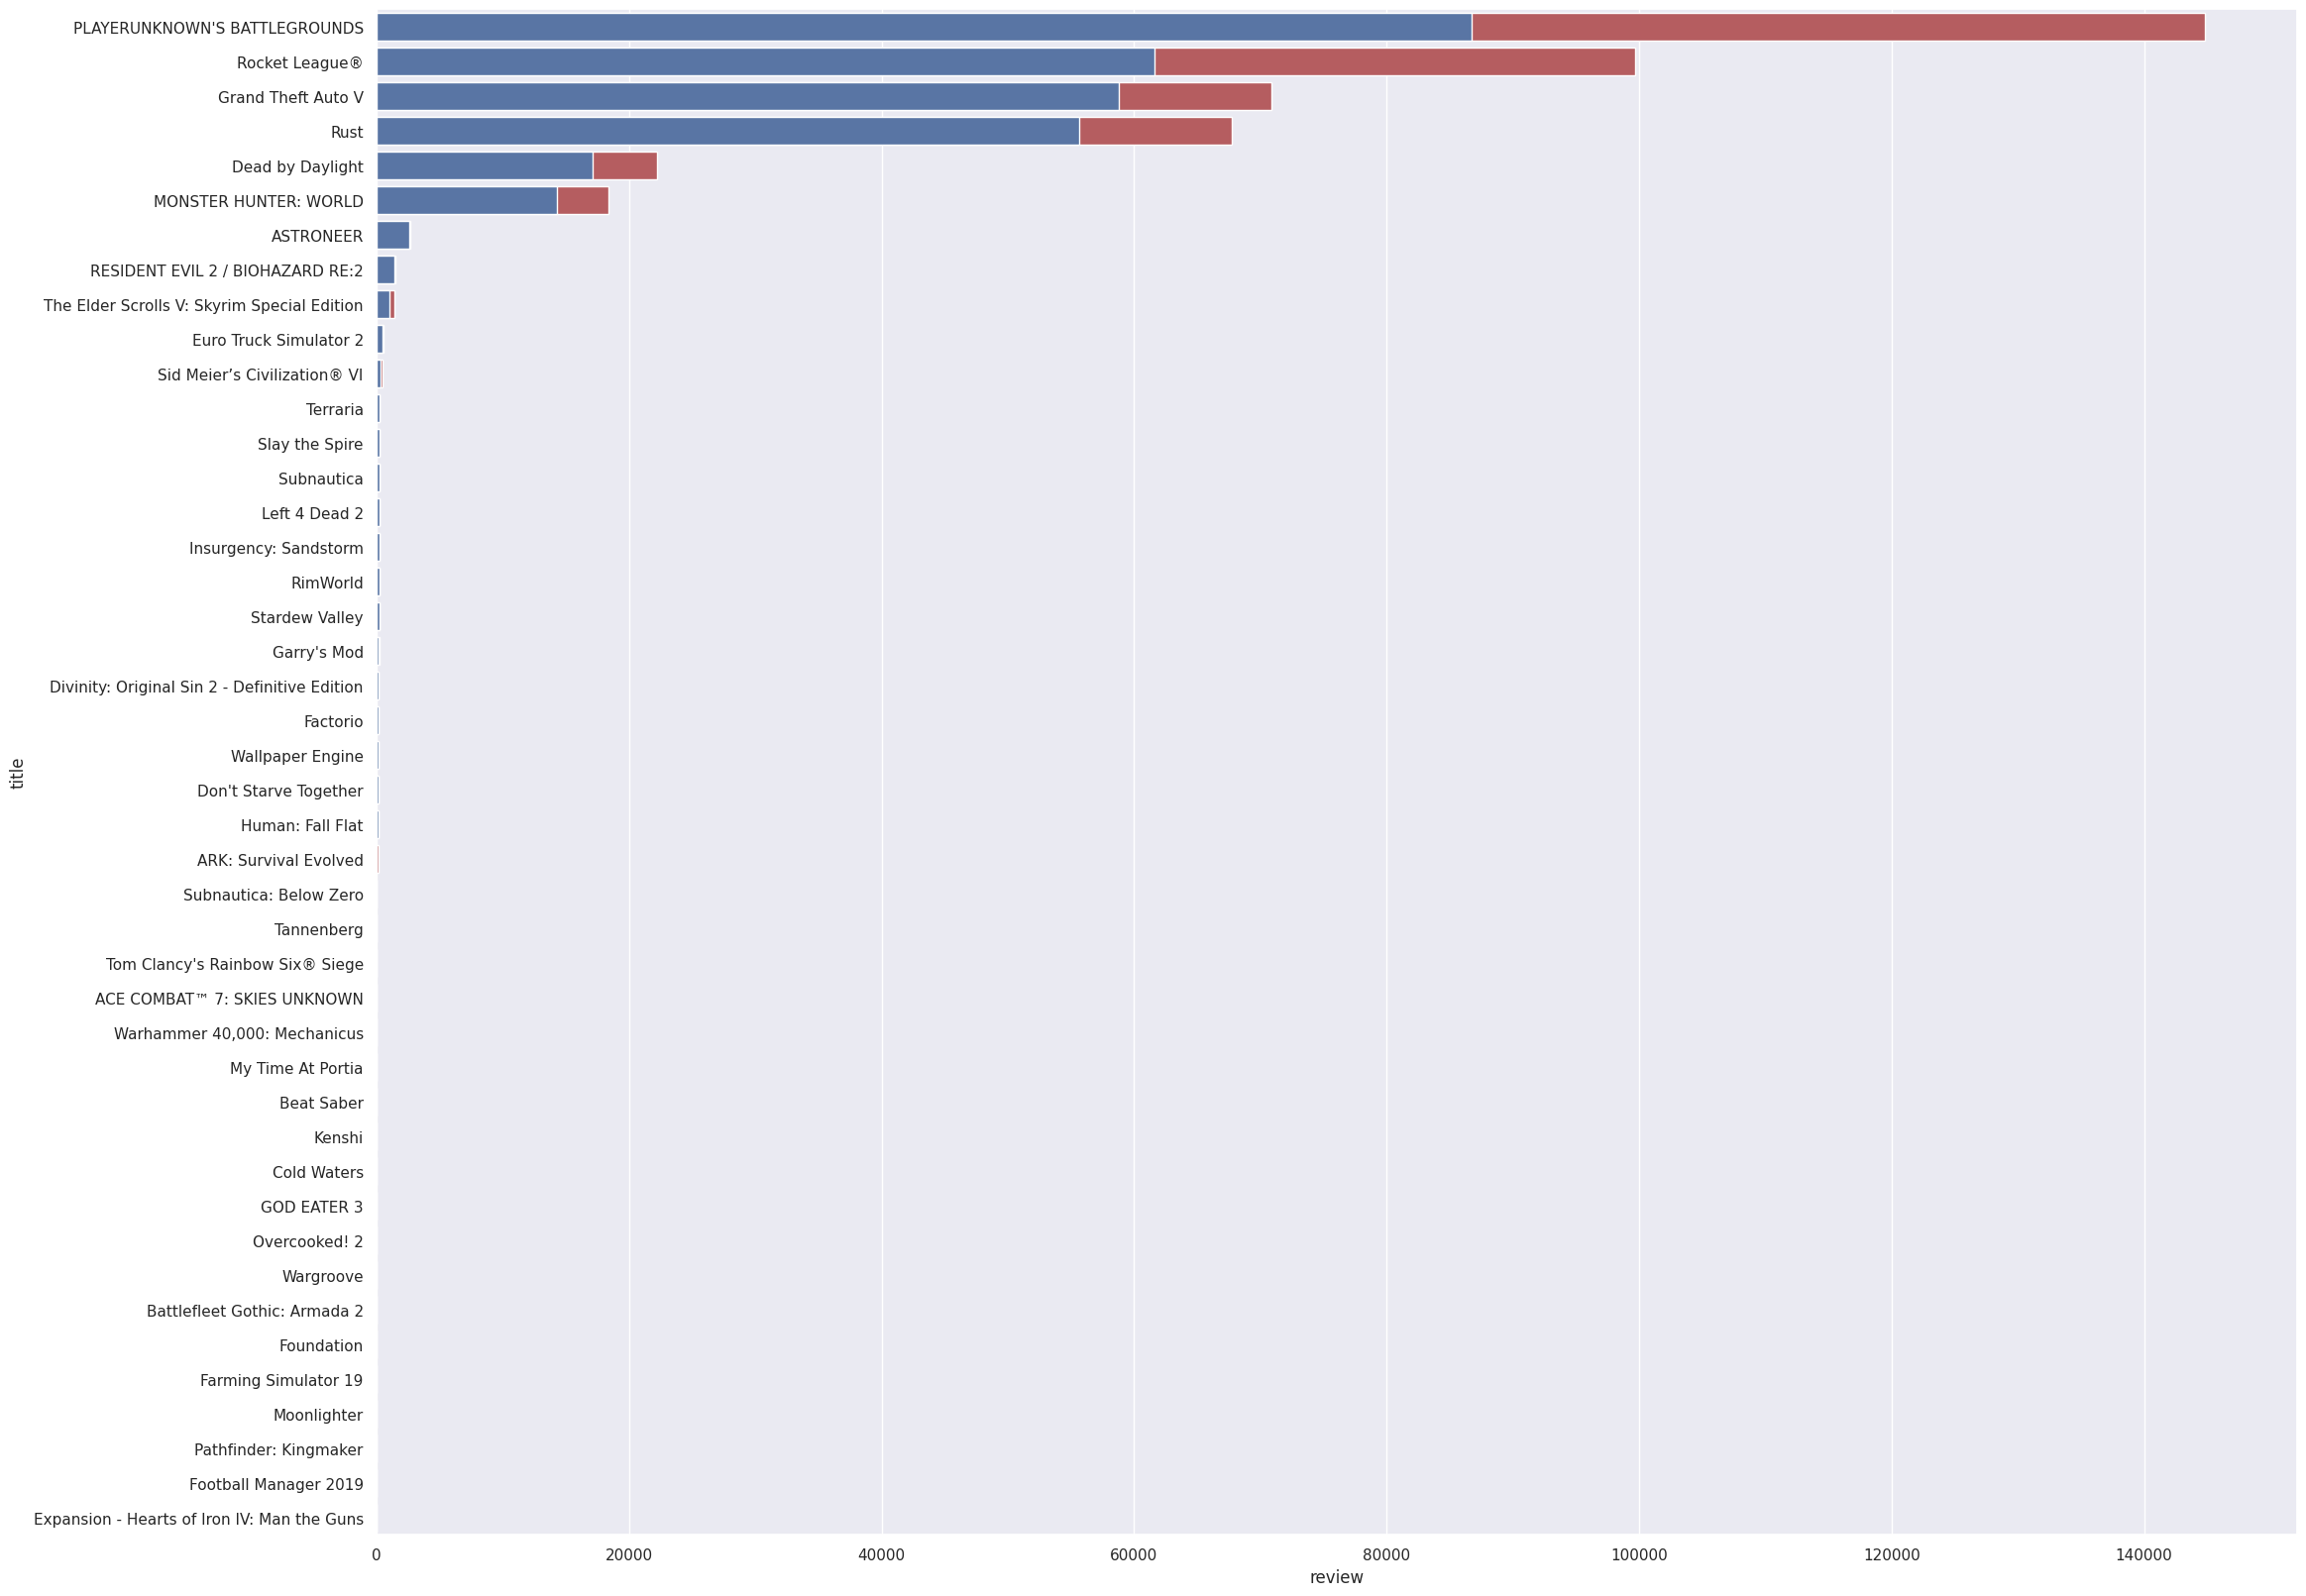

In [41]:
reviews_count = data_review.groupby(['title'])['review'].count().sort_values(ascending=False)

reviews_count = reviews_count.reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(25,20))
sns.barplot(y=reviews_count['title'], x=reviews_count['review'], data=reviews_count,
            label="Total", color="r")

reviews_count_pos = data_review.groupby(['title', 'recommendation_int'])['review'].count().sort_values(ascending=False)
reviews_count_pos = reviews_count_pos.reset_index()
reviews_count_pos = reviews_count_pos[reviews_count_pos['recommendation_int'] == 1]
sns.barplot(y=reviews_count_pos['title'], x=reviews_count_pos['review'], data=reviews_count_pos,
            label="Total", color="b")

Count of Recommended Reviews: 302751
Count of Not Recommended Reviews: 130624


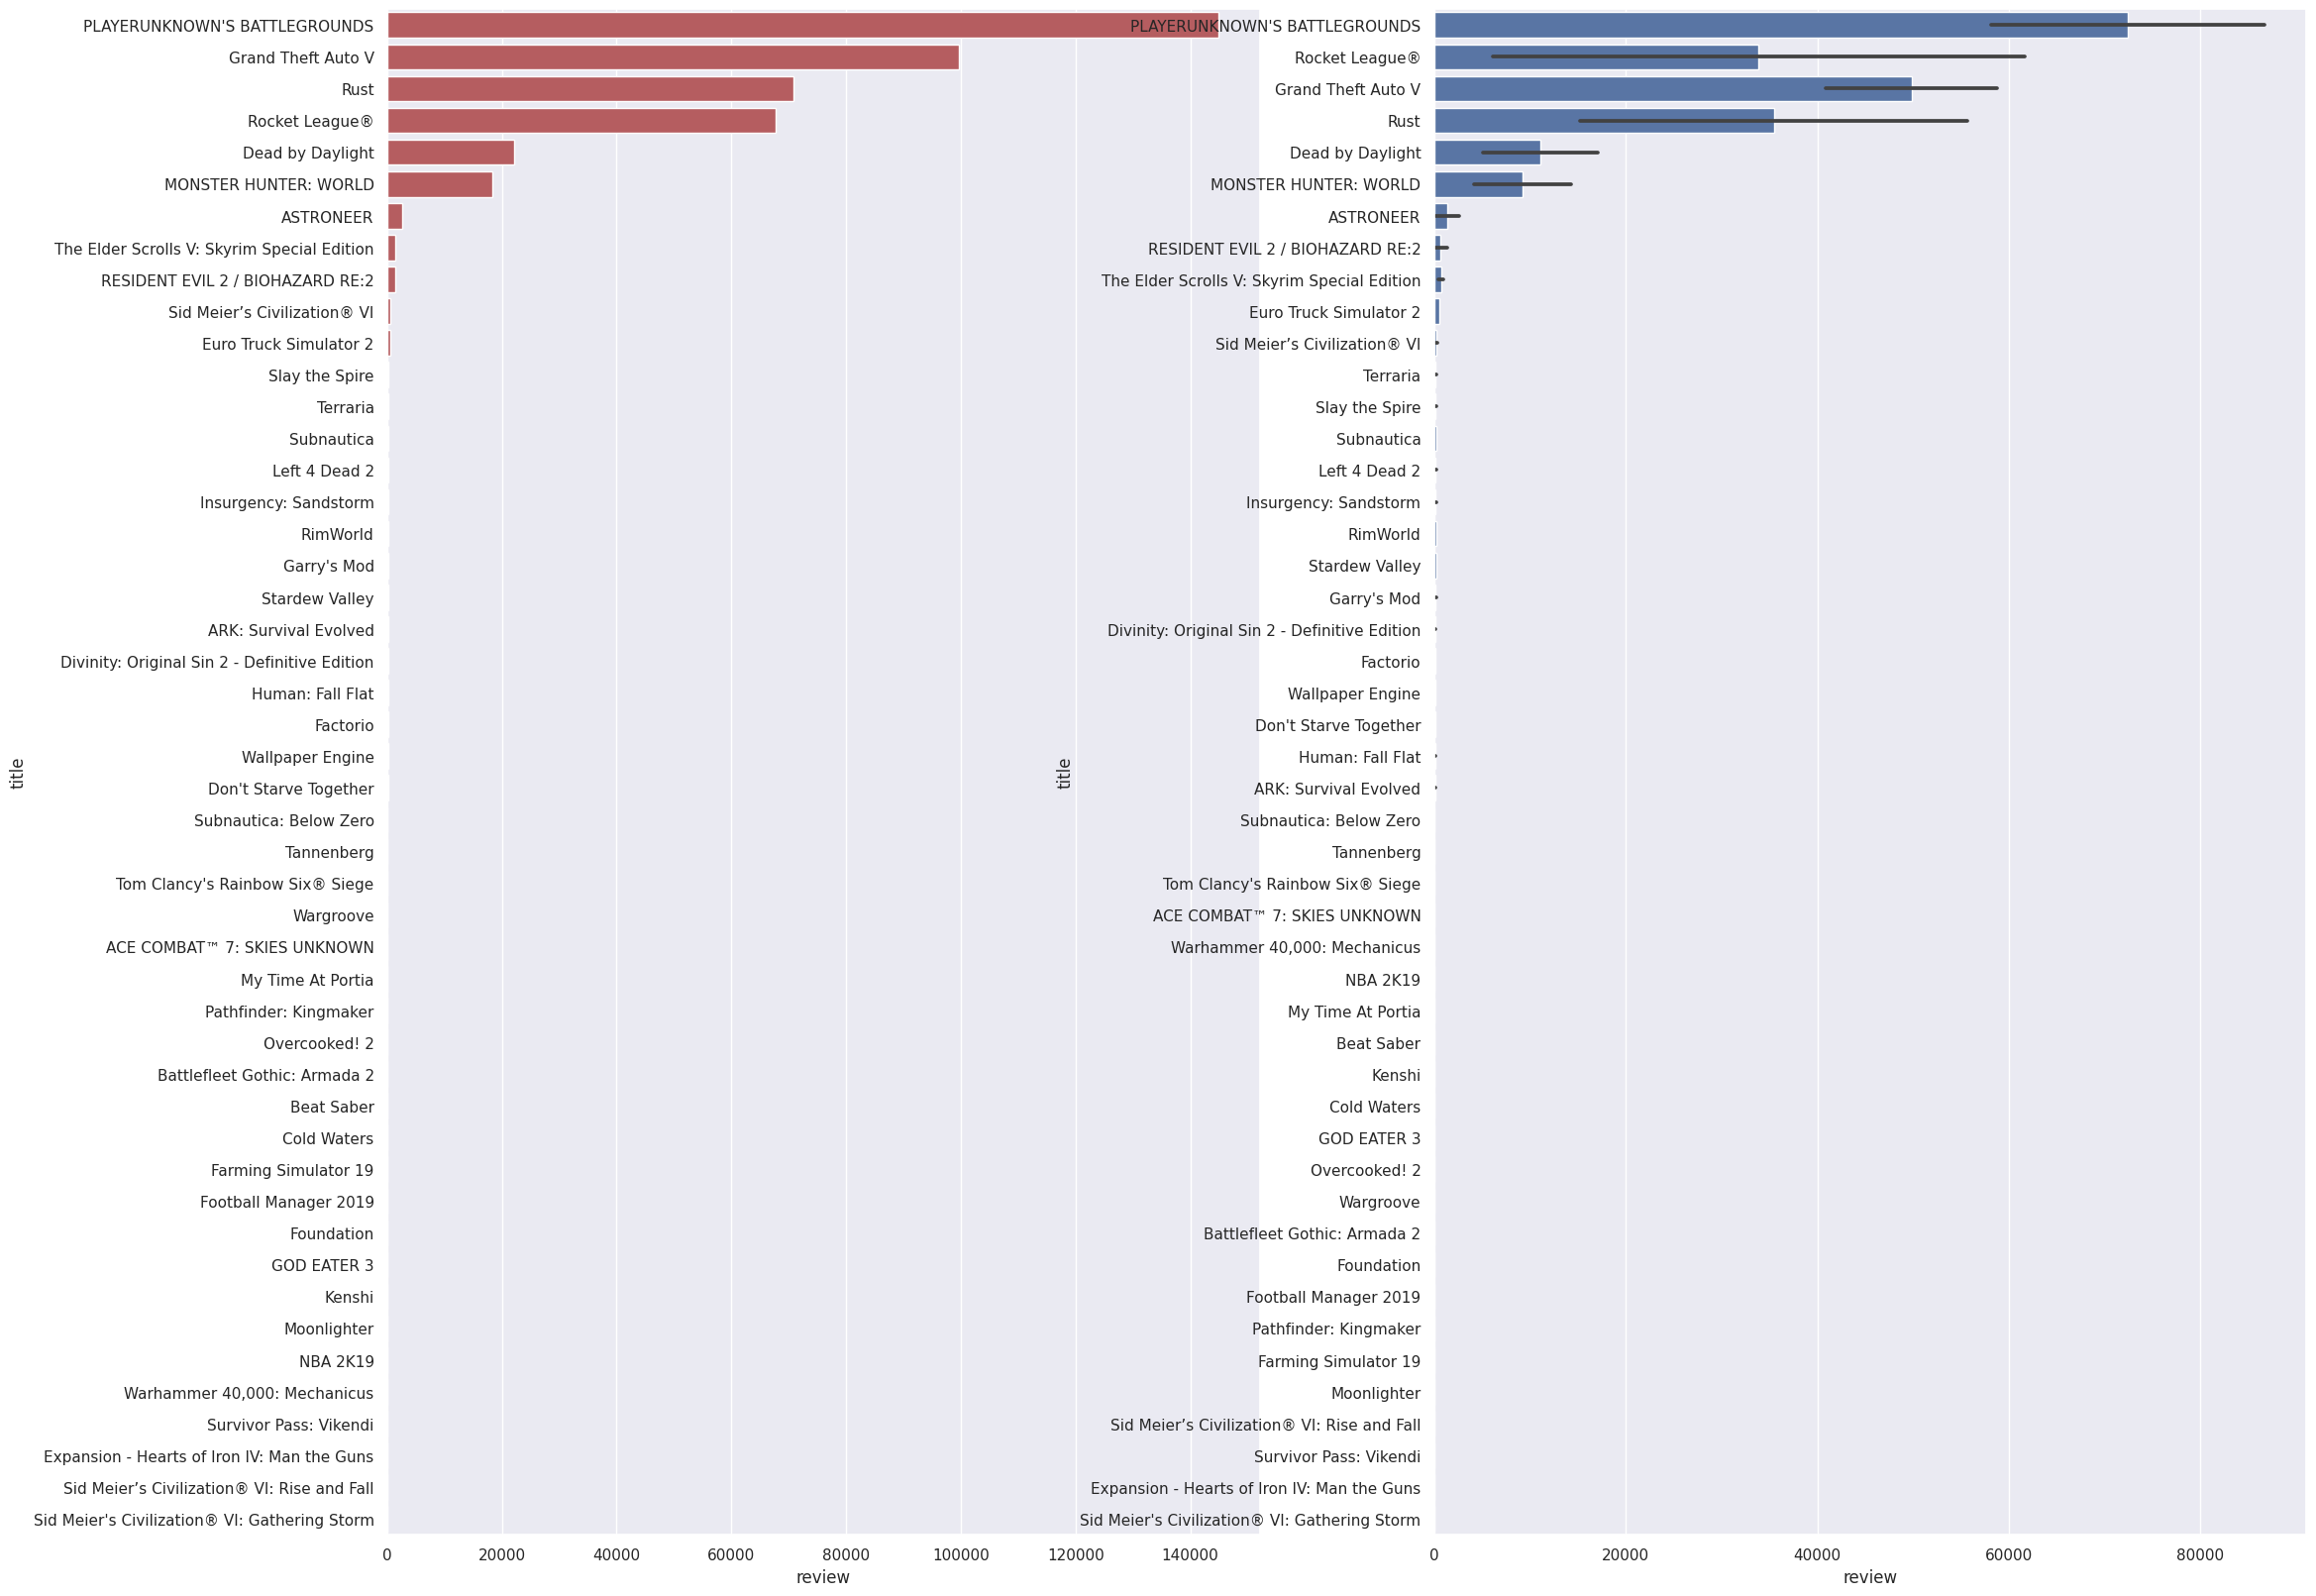

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews_count = data_review.groupby(['title'])['review'].count().sort_values(ascending=False)
reviews_count = reviews_count.reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(25, 20))

# First subplot (total reviews count)
plt.subplot(1, 2, 1)
sns.barplot(y=reviews_count['title'], x=reviews_count['review'], data=reviews_count,
            label="Total", color="r")

reviews_count_pos = data_review.groupby(['title', 'recommendation_int'])['review'].count().sort_values(ascending=False)
reviews_count_pos = reviews_count_pos.reset_index()

# Second subplot (positive reviews count)
plt.subplot(1, 2, 2)
sns.barplot(y=reviews_count_pos['title'], x=reviews_count_pos['review'], data=reviews_count_pos,
            label="Total", color="b")

# Calculate count of recommended and not recommended reviews
count_recommended = reviews_count_pos[reviews_count_pos['recommendation_int'] == 1]['review'].sum()
count_not_recommended = reviews_count_pos[reviews_count_pos['recommendation_int'] == 0]['review'].sum()

# Print the counts
print("Count of Recommended Reviews:", count_recommended)
print("Count of Not Recommended Reviews:", count_not_recommended)

plt.show()
